In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import wave
import librosa
import pandas as pd

In [2]:
df = pd.read_csv('train/info.csv', sep=';')
df = pd.get_dummies(df)
df = df.astype(float)
df.head()

,Откуда,Длительность звонка,Длительность разговора,Время ответа,Оценка,ID записи,Метка,Теги,Запись существует,Новый клиент,...,Ответственный из CRM_214 Юля Пономаренко,Ответственный из CRM_216 Ира Николенко,Ответственный из CRM_217 Наталья Левина,Ответственный из CRM_219 Софья Султанова,Ответственный из CRM_220 Марина Степаненко,Ответственный из CRM_221 Анна Суворова,Ответственный из CRM_222 Сарычева Яна Александровна Куратор,Ответственный из CRM_223 Галина Рябенко,Ответственный из CRM_223 Наталья Ковалева,Ответственный из CRM_Сотрудник не настроен в Sipuni
0,7965.0,28.0,12.0,16.0,NaN,1.652863e+09,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7965.0,31.0,12.0,19.0,NaN,1.652863e+09,NaN,NaN,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7928.0,56.0,27.0,29.0,NaN,1.652973e+09,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7938.0,160.0,148.0,12.0,NaN,1.652973e+09,NaN,NaN,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7905.0,173.0,157.0,16.0,NaN,1.652982e+09,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Разделение данных на обучающую и тестовую выборки
X = df.drop(columns=['Успешный результат'])
y = df['Успешный результат']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param = {
    'max_depth': 5,
    'learning_rate': 0.011,
    'n_estimators': 189,
    'subsample': 0.77,
    'colsample_bytree': 0.73,
    'gamma': 0.16,
    'min_child_weight': 5
}

model = xgb.XGBClassifier(**param)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание вероятностей на тестовой выборке
y_proba = model.predict_proba(X_test)

# Установка порога уверенности
threshold = 0.44 


y_pred = (y_proba[:, 1] >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, precision, recall, f1


(0.8977072310405644,
 0.8647798742138365,
 0.9482758620689655,
 0.9046052631578947)

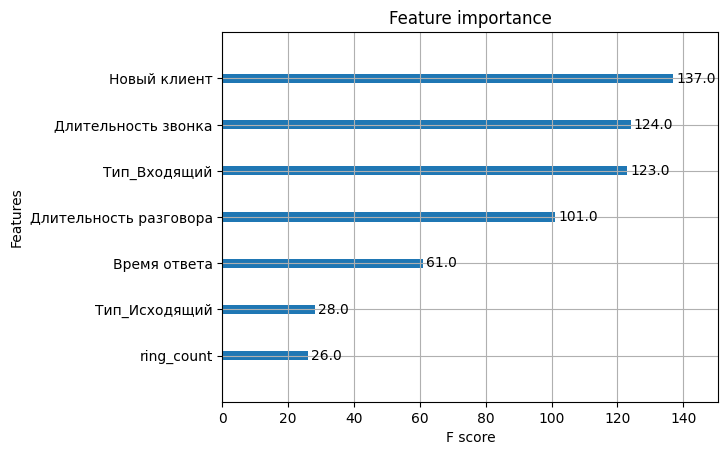

In [56]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Допустим, у вас уже есть обученная модель best_model
xgb.plot_importance(best_model, max_num_features=20)  # Укажите нужное количество признаков
plt.show()